The goal of this notebook is to prepare the dataset for the 2025 run of the classifiers.

From the 2024 run, we had nearly 120 labeled papers and predicted on 47 papers, which were then verified by experts.

As such, now we have 167 (120+47) labeled papers. The goal of this notebook is to prepare those 167 papers into a single csv.

Now, for the 2024 run, we have 2 types of classification types: single-label and multi-label. As such, we will prepare two types of 167 outputs csvs: one with single-label and one with multi-label.

Each csv will contain 5 columns, title, abstract, link, authors, and category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the original paper set
# For our case, we are interested in the 'category' column which is a list of multi-labels
df_1 = pd.read_csv('./combined_data_original.csv')
print(f"Total papers in original set: {len(df_1)}")
df_1.head()

Total papers in original set: 120


,title,category,link,authors,year,abstract
0,A Framework to Generate Neurosymbolic PDDL-com...,['plan-generation'],https://arxiv.org/abs/2303.00438,"Capitanelli, Alessio and Mastrogiovanni, Fulvio",2023,Symbolic task planning is a widely used approa...
1,A Prefrontal Cortex-inspired Architecture for ...,['brain-inspired-planning'],https://arxiv.org/abs/2310.00194,"Webb, Taylor and Mondal, Shanka Subhra and Wan...",2023,Large language models (LLMs) demonstrate impre...
2,AdaPlanner: Adaptive Planning from Feedback wi...,['interactive-planning'],https://proceedings.neurips.cc/paper_files/pap...,"Sun, Haotian and Zhuang, Yuchen and Kong, Ling...",2023,Large language models (LLMs) have recently dem...
3,Alphazero-like tree-search can guide large lan...,['heuristics-optimization'],https://arxiv.org/abs/2309.17179,"Feng, Xidong and Wan, Ziyu and Wen, Muning and...",2023,Recent works like Tree-of-Thought (ToT) and Re...
4,Api-bank: A benchmark for tool-augmented llms,['tool-integration'],https://arxiv.org/abs/2304.08244,"Li, Minghao and Song, Feifan and Yu, Bowen and...",2023,Recent research has demonstrated that Large La...


In [3]:
# Let's drop the unneeded columns
df_1_cols = list(df_1.columns)
df_1_cols.remove('year')
print(df_1_cols)

# Rearrange
df_1_cols = [df_1_cols[0], df_1_cols[-1], df_1_cols[2], df_1_cols[-2], df_1_cols[1]]
print(df_1_cols)

# Put back
df_1 = df_1[df_1_cols]
df_1.head()

['title', 'category', 'link', 'authors', 'abstract']
['title', 'abstract', 'link', 'authors', 'category']


,title,abstract,link,authors,category
0,A Framework to Generate Neurosymbolic PDDL-com...,Symbolic task planning is a widely used approa...,https://arxiv.org/abs/2303.00438,"Capitanelli, Alessio and Mastrogiovanni, Fulvio",['plan-generation']
1,A Prefrontal Cortex-inspired Architecture for ...,Large language models (LLMs) demonstrate impre...,https://arxiv.org/abs/2310.00194,"Webb, Taylor and Mondal, Shanka Subhra and Wan...",['brain-inspired-planning']
2,AdaPlanner: Adaptive Planning from Feedback wi...,Large language models (LLMs) have recently dem...,https://proceedings.neurips.cc/paper_files/pap...,"Sun, Haotian and Zhuang, Yuchen and Kong, Ling...",['interactive-planning']
3,Alphazero-like tree-search can guide large lan...,Recent works like Tree-of-Thought (ToT) and Re...,https://arxiv.org/abs/2309.17179,"Feng, Xidong and Wan, Ziyu and Wen, Muning and...",['heuristics-optimization']
4,Api-bank: A benchmark for tool-augmented llms,Recent research has demonstrated that Large La...,https://arxiv.org/abs/2304.08244,"Li, Minghao and Song, Feifan and Yu, Bowen and...",['tool-integration']


<br>

In [4]:
# Read the new single-label
# For our case, we are interested in the 'Categories' column which is a string (of single-labels)
df_2 = pd.read_csv('../outputs/tf_single_final.csv')
print(f"Total papers in new single-label set: {len(df_2)}")
df_2.head()

Total papers in new single-label set: 47


,Title,Authors,Published Date,Abstract,URL,Categories,Comments,text,BERT_predicted,SciBERT_predicted
0,LASP: Surveying the State-of-the-Art in Large ...,"Haoming Li, Zhaoliang Chen, Jonathan Zhang, Fe...",2024-09-03,Effective planning is essential for the succes...,http://arxiv.org/abs/2409.01806v1,goal-decomposition,Survey paper,LASP: Surveying the State-of-the-Art in Large ...,language-translation,tool-integration
1,Planetarium: A Rigorous Benchmark for Translat...,"Max Zuo, Francisco Piedrahita Velez, Xiaochen ...",2024-07-03,Many recent works have explored using language...,http://arxiv.org/abs/2407.03321v1,language-translation,NaN,Planetarium: A Rigorous Benchmark for Translat...,language-translation,multiagent-planning
2,Automated radiotherapy treatment planning guid...,"Sheng Liu, Oscar Pastor-Serrano, Yizheng Chen,...",2024-06-21,Radiotherapy treatment planning is a time-cons...,http://arxiv.org/abs/2406.15609v2,interactive-planning,NaN,Automated radiotherapy treatment planning guid...,model-construction,multiagent-planning
3,RePrompt: Planning by Automatic Prompt Enginee...,"Weizhe Chen, Sven Koenig, Bistra Dilkina",2024-06-17,"In this past year, large language models (LLMs...",http://arxiv.org/abs/2406.11132v1,interactive-planning,NaN,RePrompt: Planning by Automatic Prompt Enginee...,language-translation,multiagent-planning
4,DAG-Plan: Generating Directed Acyclic Dependen...,"Zeyu Gao, Yao Mu, Jinye Qu, Mengkang Hu, Lingy...",2024-06-14,Dual-arm robots offer enhanced versatility and...,http://arxiv.org/abs/2406.09953v2,model-construction,NaN,DAG-Plan: Generating Directed Acyclic Dependen...,model-construction,multiagent-planning


In [5]:
# Similar to df_1, drop unneeded columns
df_2_cols = list(df_2.columns)
to_rem = {'Published Date', 'Comments', 'text', 'BERT_predicted', 'SciBERT_predicted'}
df_2_cols = list(filter(lambda x: x not in to_rem, df_2_cols))
print(df_2_cols)

# Rearrange
df_2_cols = [df_2_cols[0], df_2_cols[2], df_2_cols[-2], df_2_cols[1], df_2_cols[-1]]
print(df_2_cols)

# Rename: (1) Lowercase and (2) 'URL' to 'link' and 'Categories' to 'category'
df_2 = df_2[df_2_cols]
# lowercase column name and update
df_2.columns = df_2.columns.str.lower()
df_2 = df_2.rename(columns={
    'url': 'link',
    'categories': 'category'
})
df_2.head()

['Title', 'Authors', 'Abstract', 'URL', 'Categories']
['Title', 'Abstract', 'URL', 'Authors', 'Categories']


,title,abstract,link,authors,category
0,LASP: Surveying the State-of-the-Art in Large ...,Effective planning is essential for the succes...,http://arxiv.org/abs/2409.01806v1,"Haoming Li, Zhaoliang Chen, Jonathan Zhang, Fe...",goal-decomposition
1,Planetarium: A Rigorous Benchmark for Translat...,Many recent works have explored using language...,http://arxiv.org/abs/2407.03321v1,"Max Zuo, Francisco Piedrahita Velez, Xiaochen ...",language-translation
2,Automated radiotherapy treatment planning guid...,Radiotherapy treatment planning is a time-cons...,http://arxiv.org/abs/2406.15609v2,"Sheng Liu, Oscar Pastor-Serrano, Yizheng Chen,...",interactive-planning
3,RePrompt: Planning by Automatic Prompt Enginee...,"In this past year, large language models (LLMs...",http://arxiv.org/abs/2406.11132v1,"Weizhe Chen, Sven Koenig, Bistra Dilkina",interactive-planning
4,DAG-Plan: Generating Directed Acyclic Dependen...,Dual-arm robots offer enhanced versatility and...,http://arxiv.org/abs/2406.09953v2,"Zeyu Gao, Yao Mu, Jinye Qu, Mengkang Hu, Lingy...",model-construction


In [6]:
# For df_2, we also need to ensure that the 'category' column is a list of strings
df_2['category'] = df_2['category'].apply(lambda x: [x])
df_2.head()

,title,abstract,link,authors,category
0,LASP: Surveying the State-of-the-Art in Large ...,Effective planning is essential for the succes...,http://arxiv.org/abs/2409.01806v1,"Haoming Li, Zhaoliang Chen, Jonathan Zhang, Fe...",[goal-decomposition]
1,Planetarium: A Rigorous Benchmark for Translat...,Many recent works have explored using language...,http://arxiv.org/abs/2407.03321v1,"Max Zuo, Francisco Piedrahita Velez, Xiaochen ...",[language-translation]
2,Automated radiotherapy treatment planning guid...,Radiotherapy treatment planning is a time-cons...,http://arxiv.org/abs/2406.15609v2,"Sheng Liu, Oscar Pastor-Serrano, Yizheng Chen,...",[interactive-planning]
3,RePrompt: Planning by Automatic Prompt Enginee...,"In this past year, large language models (LLMs...",http://arxiv.org/abs/2406.11132v1,"Weizhe Chen, Sven Koenig, Bistra Dilkina",[interactive-planning]
4,DAG-Plan: Generating Directed Acyclic Dependen...,Dual-arm robots offer enhanced versatility and...,http://arxiv.org/abs/2406.09953v2,"Zeyu Gao, Yao Mu, Jinye Qu, Mengkang Hu, Lingy...",[model-construction]


<br>

In [7]:
# Read the new multi-label
# For our case, we are interested in the 'Categories' column which is a list (of multi-labeled strings)
df_3 = pd.read_csv('../outputs/tf_multi_final.csv.csv')
print(f"Total papers in new multi-label set: {len(df_3)}")
df_3.head()

Total papers in new multi-label set: 47


,Title,Authors,Published Date,Abstract,URL,Categories,Comments,text,BERT_predicted,SciBERT_predicted
0,LASP: Surveying the State-of-the-Art in Large ...,"Haoming Li, Zhaoliang Chen, Jonathan Zhang, Fe...",2024-09-03,Effective planning is essential for the succes...,http://arxiv.org/abs/2409.01806v1,"['plan-generation', 'goal-decomposition']",Survey paper,LASP: Surveying the State-of-the-Art in Large ...,"('brain-inspired-planning',)","('language-translation', 'multiagent-planning'..."
1,Planetarium: A Rigorous Benchmark for Translat...,"Max Zuo, Francisco Piedrahita Velez, Xiaochen ...",2024-07-03,Many recent works have explored using language...,http://arxiv.org/abs/2407.03321v1,['language-translation'],NaN,Planetarium: A Rigorous Benchmark for Translat...,"('brain-inspired-planning', 'interactive-plann...","('language-translation', 'multiagent-planning'..."
2,Automated radiotherapy treatment planning guid...,"Sheng Liu, Oscar Pastor-Serrano, Yizheng Chen,...",2024-06-21,Radiotherapy treatment planning is a time-cons...,http://arxiv.org/abs/2406.15609v2,"['plan-generation', 'interactive-planning']",NaN,Automated radiotherapy treatment planning guid...,"('brain-inspired-planning', 'multiagent-planni...","('language-translation', 'multiagent-planning'..."
3,RePrompt: Planning by Automatic Prompt Enginee...,"Weizhe Chen, Sven Koenig, Bistra Dilkina",2024-06-17,"In this past year, large language models (LLMs...",http://arxiv.org/abs/2406.11132v1,"['plan-generation', 'interactive-planning']",NaN,RePrompt: Planning by Automatic Prompt Enginee...,"('brain-inspired-planning', 'multiagent-planni...","('language-translation', 'multiagent-planning'..."
4,DAG-Plan: Generating Directed Acyclic Dependen...,"Zeyu Gao, Yao Mu, Jinye Qu, Mengkang Hu, Lingy...",2024-06-14,Dual-arm robots offer enhanced versatility and...,http://arxiv.org/abs/2406.09953v2,['model-construction'],NaN,DAG-Plan: Generating Directed Acyclic Dependen...,"('brain-inspired-planning', 'interactive-plann...","('brain-inspired-planning', 'language-translat..."


In [8]:
# Similar to df_2, drop unneeded columns
df_3_cols = list(df_3.columns)
to_rem = {'Published Date', 'Comments', 'text', 'BERT_predicted', 'SciBERT_predicted'}
df_3_cols = list(filter(lambda x: x not in to_rem, df_3_cols))
print(df_3_cols)

# Rearrange
df_3_cols = [df_3_cols[0], df_3_cols[2], df_3_cols[-2], df_3_cols[1], df_3_cols[-1]]
print(df_3_cols)

# Rename: (1) Lowercase and (2) 'URL' to 'link' and 'Categories' to 'category'
df_3 = df_3[df_3_cols]
# lowercase column name and update
df_3.columns = df_3.columns.str.lower()
df_3 = df_3.rename(columns={
    'url': 'link',
    'categories': 'category'
})
df_3.head()

['Title', 'Authors', 'Abstract', 'URL', 'Categories']
['Title', 'Abstract', 'URL', 'Authors', 'Categories']


,title,abstract,link,authors,category
0,LASP: Surveying the State-of-the-Art in Large ...,Effective planning is essential for the succes...,http://arxiv.org/abs/2409.01806v1,"Haoming Li, Zhaoliang Chen, Jonathan Zhang, Fe...","['plan-generation', 'goal-decomposition']"
1,Planetarium: A Rigorous Benchmark for Translat...,Many recent works have explored using language...,http://arxiv.org/abs/2407.03321v1,"Max Zuo, Francisco Piedrahita Velez, Xiaochen ...",['language-translation']
2,Automated radiotherapy treatment planning guid...,Radiotherapy treatment planning is a time-cons...,http://arxiv.org/abs/2406.15609v2,"Sheng Liu, Oscar Pastor-Serrano, Yizheng Chen,...","['plan-generation', 'interactive-planning']"
3,RePrompt: Planning by Automatic Prompt Enginee...,"In this past year, large language models (LLMs...",http://arxiv.org/abs/2406.11132v1,"Weizhe Chen, Sven Koenig, Bistra Dilkina","['plan-generation', 'interactive-planning']"
4,DAG-Plan: Generating Directed Acyclic Dependen...,Dual-arm robots offer enhanced versatility and...,http://arxiv.org/abs/2406.09953v2,"Zeyu Gao, Yao Mu, Jinye Qu, Mengkang Hu, Lingy...",['model-construction']


<br>

In [9]:
# The goal is to combine (df_1, df_2) and (df_1, df_3) into single-label and multi-label datasets respectively.
# Plan is to 
# (1) concatenate the two dfs, 
# (2) check for duplicates, 
# (3) visualize the 'category' column if none duplicates

# However, when combining for the single-label case, we need to ensure that the multi-labels in df_1 are single-labeled by picking the first category in the list

# 1
df_1['category'] = df_1['category'].apply(lambda x: [eval(x)[0]] if isinstance(x, str) else x[0])
df_single = pd.concat([df_1, df_2], ignore_index=True)
df_multi = pd.concat([df_1, df_3], ignore_index=True)
print(f"Total papers in single-label combined set: {len(df_single)}")
print(f"Total papers in multi-label combined set: {len(df_multi)}")

# 2
dups_single = df_single.duplicated(subset=['title', 'abstract', 'link'])
dups_multi = df_multi.duplicated(subset=['title', 'abstract', 'link'])
print(f"Total duplicates in single-label combined set: {dups_single.sum()}")
print(f"Total duplicates in multi-label combined set: {dups_multi.sum()}")

Total papers in single-label combined set: 167
Total papers in multi-label combined set: 167
Total duplicates in single-label combined set: 0
Total duplicates in multi-label combined set: 0


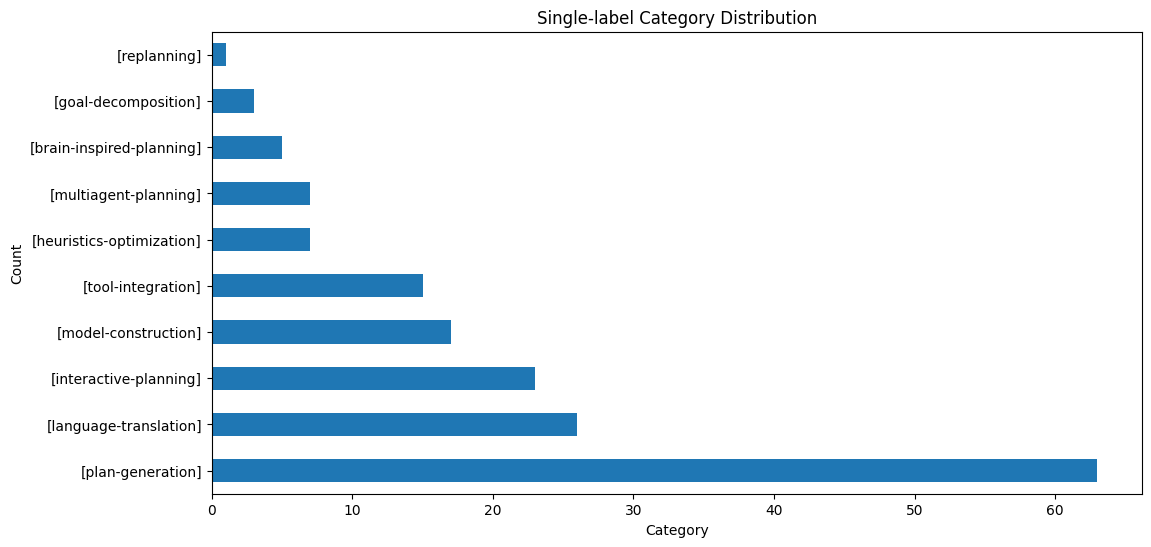

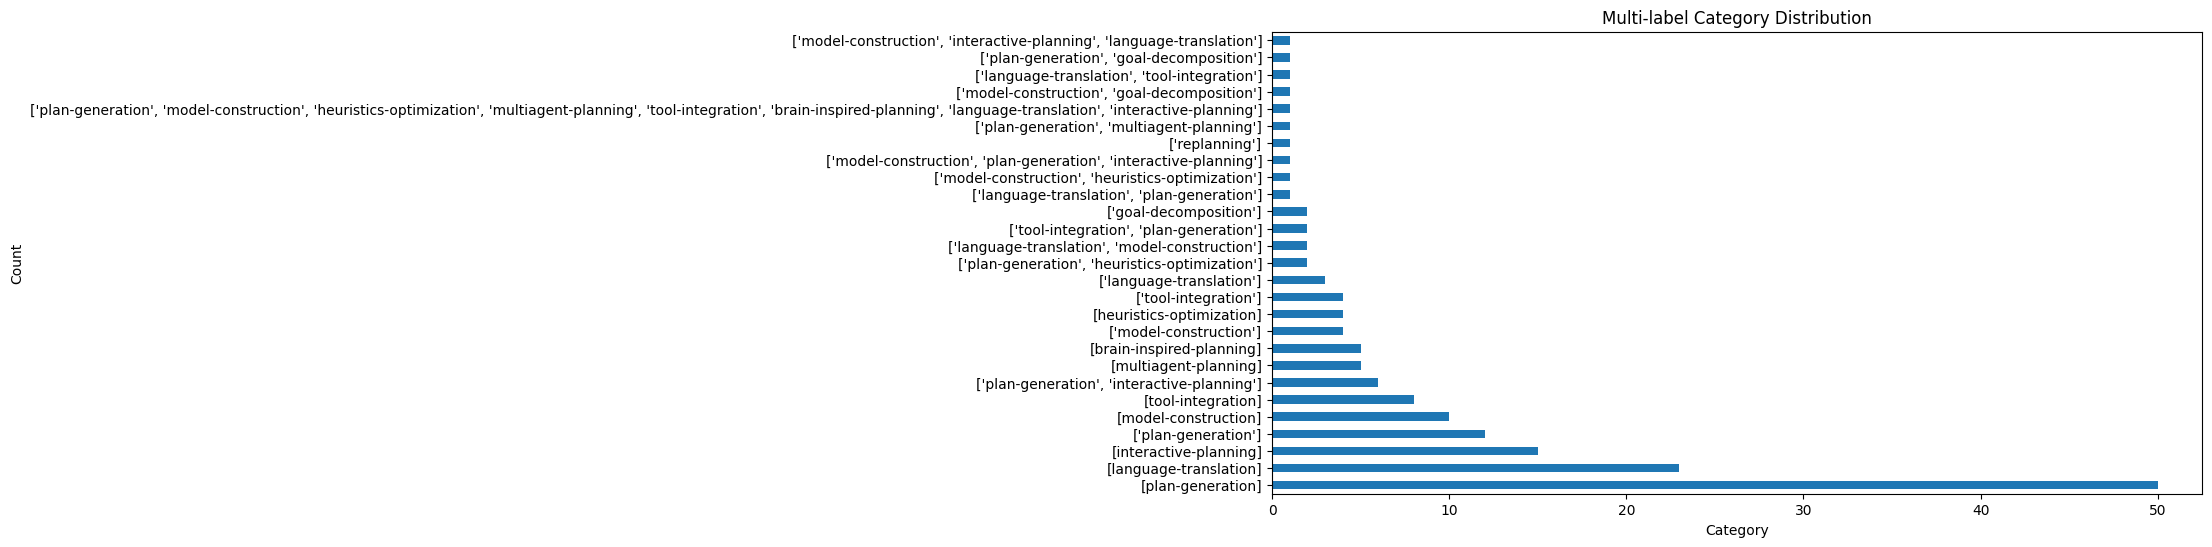

In [10]:
# 3: Visualize the 'category' column distributions
plt.figure(figsize=(12, 6))
df_single['category'].value_counts().plot(kind='barh')
plt.title('Single-label Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
df_multi['category'].value_counts().plot(kind='barh')
plt.title('Multi-label Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Final Step: Save Combined Datasets

Now that we've verified the data quality, let's save both datasets to CSV files for use in the 2025 classification run.

In [11]:
# Final step: Save the combined datasets to CSV files
single_output_path = './combined_single_label_2025.csv'
multi_output_path = './combined_multi_label_2025.csv'

df_single.to_csv(single_output_path, index=False)
df_multi.to_csv(multi_output_path, index=False)

print("\nDatasets saved successfully:")
print(f"  Single-label: {single_output_path}")
print(f"  Multi-label: {multi_output_path}")


Datasets saved successfully:
  Single-label: ./combined_single_label_2025.csv
  Multi-label: ./combined_multi_label_2025.csv
